In [20]:
import numpy as np 
import matplotlib.pyplot as plt
import h5py
import qp

In [21]:
# Choose between lens or shear.

with h5py.File("lens_photoz_stack.hdf5") as f:
    group = f["n_of_z/lens"]

    # Read the z grid
    z = group["z"][:]

    # Read the number of tomo bins from the metadada
    nbin = group.attrs["nbin"]

    # Read the n(z)
    nz = np.zeros((nbin, z.size))
    for i in range(nbin):
        nz[i] = group[f"bin_{i}"][:]
        
with h5py.File("shear_photoz_stack.hdf5") as f:
    group = f["n_of_z"]
    
    # Read the z grid
    source = group["source"]
    z_shear = source['z'][::]

    # Read the n(z)
    nz_shear = []
    for i in range(5):
        nz_shear.append(source[f"bin_{i}"][:])
    nz_shear = np.array(nz_shear)

In [22]:
nz_qp_lens = qp.Ensemble(qp.interp, data=dict(xvals=z, yvals=nz, check_input=True))
nz_qp_shear = qp.Ensemble(qp.interp, data=dict(xvals=z_shear, yvals=nz_shear, check_input=True))

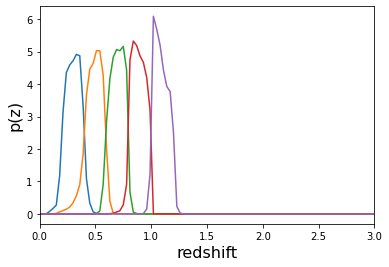

In [43]:
key = 0
axes_g = nz_qp_lens.plot(key, xlim=(0,3),label='orig')

for key in range(1,5):
    nz_qp_lens.plot(key,label='orig', axes=axes_g)

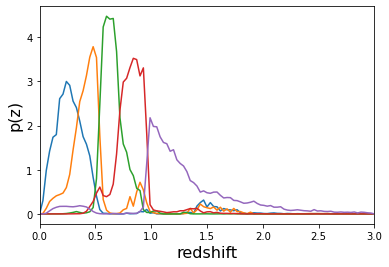

In [24]:
key = 0
axes_g = nz_qp_shear.plot(key, xlim=(0,3),label='orig')

for key in range(1,5):
    nz_qp_shear.plot(key,label='orig', axes=axes_g)

In [ ]:
nz_qp_lens.write_to("nz_qp_lens.fits")
nz_qp_shear.write_to("nz_qp_shear.fits")

In [153]:
# Make them available in h5 format

In [156]:
z_grid = np.linspace(0, 3, 101)

In [ ]:
with h5py.File("nz_qp_lens.h5", "w") as f:
    f['Z_MID'] = z_grid
    f['nz_0'] = nz_qp_lens.pdf(z_grid)[0]
    f['nz_1'] = nz_qp_lens.pdf(z_grid)[1]
    f['nz_2'] = nz_qp_lens.pdf(z_grid)[2]
    f['nz_3'] = nz_qp_lens.pdf(z_grid)[3]
    f['nz_4'] = nz_qp_lens.pdf(z_grid)[4]

In [ ]:
with h5py.File("nz_qp_shear.h5", "w") as f:
    f['Z_MID'] = z_grid
    f['nz_0'] = nz_qp_shear.pdf(z_grid)[0]
    f['nz_1'] = nz_qp_shear.pdf(z_grid)[1]
    f['nz_2'] = nz_qp_shear.pdf(z_grid)[2]
    f['nz_3'] = nz_qp_shear.pdf(z_grid)[3]
    f['nz_4'] = nz_qp_shear.pdf(z_grid)[4]